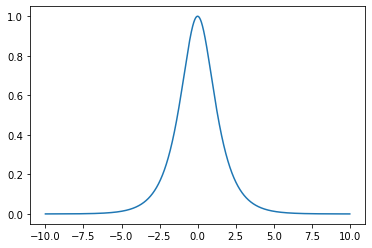

In [462]:
import numpy as np
import math
from math import fabs, sin, exp, pi, cosh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1

def Soliton(t, c=1):
    return c*lamb/cosh(lamb*t)

c = -10
d = 10
M = 100000
tau = (d-c)/(M)

def CreateList(f):
    asw = []
    for i in tqdm(range(M+1)):
        asw.append(f(i*tau + c))
    return asw

t = [i*tau + c for i in range(M+1)]
sol = CreateList(Soliton)

plt.plot(t, sol)

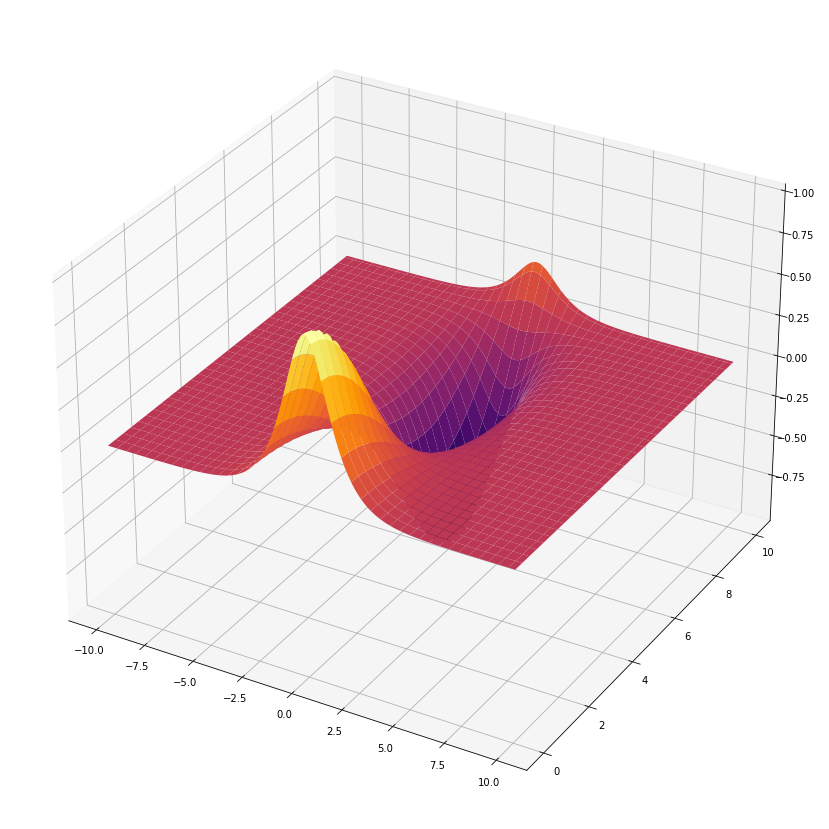

In [463]:
import numpy as np
import cmath
from cmath import sin, cos, exp, pi, sqrt
import math
from math import cosh, tanh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 100
M = 128
h = (b-a)/(N)
tau = (d-c)/(M)

def Soliton(t, coef=1):
    return coef*lamb/cosh(lamb*t)

def CreateList(f):
    asw = []
    for i in tqdm(range(M+1)):
        asw.append(f(i*tau + c))
    return asw

def AnalyticSolution(N, M):
    A  = np.empty((N+1, M+1), dtype=complex)
    A_0 = CreateList(Soliton)
    for n in tqdm(range(N+1)):
        z = n*h + a
        for m in range(M+1):
            A[n][m] = A_0[m] * exp(-1j*beta2*lamb**2*z/2)
    return A

z = np.linspace(a, b, N+1)
t = np.linspace(c, d, M+1)
T, Z = np.meshgrid(t, z)
Ansol1 = AnalyticSolution(N,M)

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, Z, Ansol1.real, cmap='inferno')

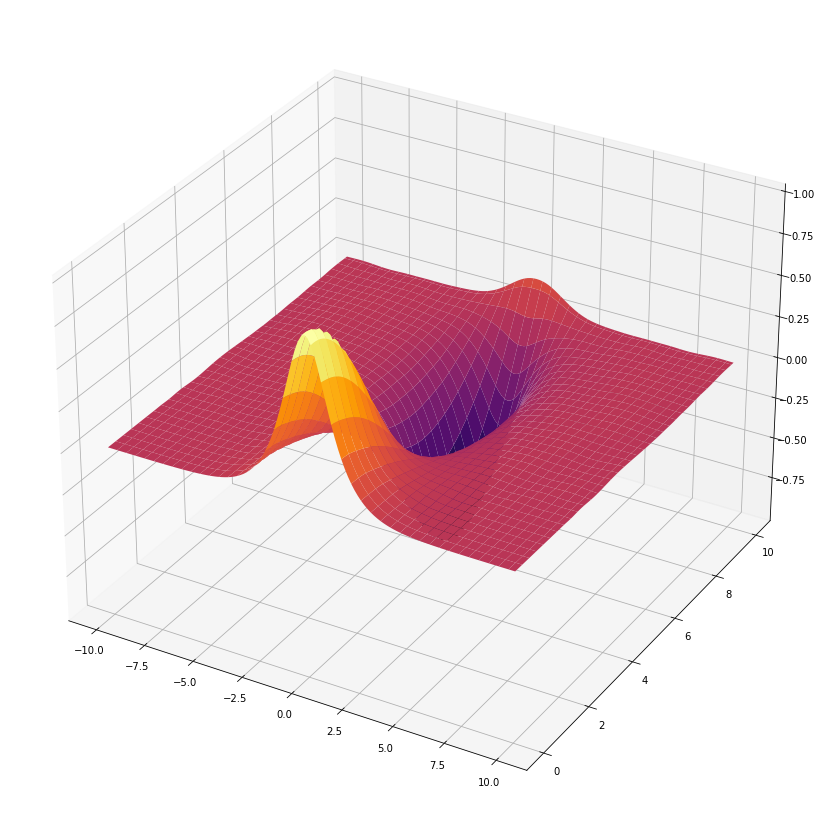

In [464]:
import numpy as np
import scipy
from scipy.fft import fft, ifft, fftshift, ifftshift
import cmath
from cmath import sin, exp, pi, sqrt
import math
from math import cosh, tanh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 100
M = 128
h = (b-a)/N
tau = (d-c)/M


def Soliton(time, k=1):
    return k*lamb/cosh(lamb*time)

def CreateArr(f):
    asw = np.empty(M+1)
    for i in range(M+1):
        asw[i] = f(i*tau + c)
    return asw

def NonLinear(psi):
    new = np.empty(M+1, dtype=complex)
    for m in range(M+1):
        norm = abs(psi[m])
        new[m] = psi[m] * exp(1j*gamma*h*norm**2)
    return new

def Dispersion(psi, w, k):
    new = np.empty(M+1, dtype=complex)
    for m in range(M+1):
        new[m] = psi[m] * exp((1j*beta2*h*w[m]**2)/k)
    return new



def FirstOrderMethod(psi, w):
    psi = NonLinear(psi)
    psi = fft(psi)
    psi = Dispersion(psi, w, 2)
    psi = ifft(psi)
    return psi

def SecondOrderMethod(psi, w):
    psi = fft(psi)
    psi = Dispersion(psi, w, 4)
    psi = ifft(psi)
    psi = NonLinier(psi)
    psi = fft(psi)
    psi = Dispersion(psi, w, 4)
    psi = ifft(psi)
    return psi

A1  = np.empty((N+1, M+1), dtype=complex)
z = np.linspace(a, b, N+1)
t = np.linspace(c, d, M+1)
T, Z = np.meshgrid(t, z)
w = fftfreq(M+1, (d-c)/(M+1))*2*pi


for n in tqdm(range(N+1)):
    if n == 0:
        psi = CreateArr(Soliton)
        for m in range(M+1):
            A1[0][m] = psi[m]
        continue
    new = FirstOrderMethod(A1[n-1], w)
    for m in range(M+1):
        A1[n][m] = new[m]


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, Z, A1.real, cmap='inferno')

In [465]:
a1abs = np.max(abs(abs(A1) - abs(Ansol1)))

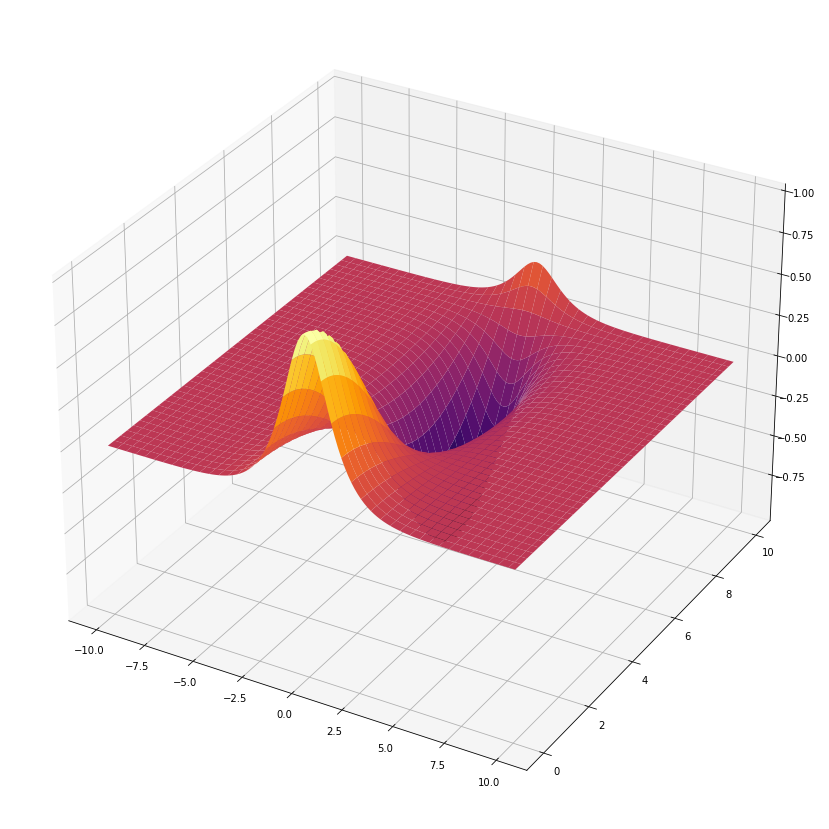

In [466]:
import numpy as np
import cmath
from cmath import sin, cos, exp, pi, sqrt
import math
from math import cosh, tanh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 200
M = 128
h = (b-a)/(N)
tau = (d-c)/(M)

z = np.linspace(a, b, N+1)
t = np.linspace(c, d, M+1)
T, Z = np.meshgrid(t, z)
Ansol2 = AnalyticSolution(N, M)

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, Z, Ansol2.real, cmap='inferno')

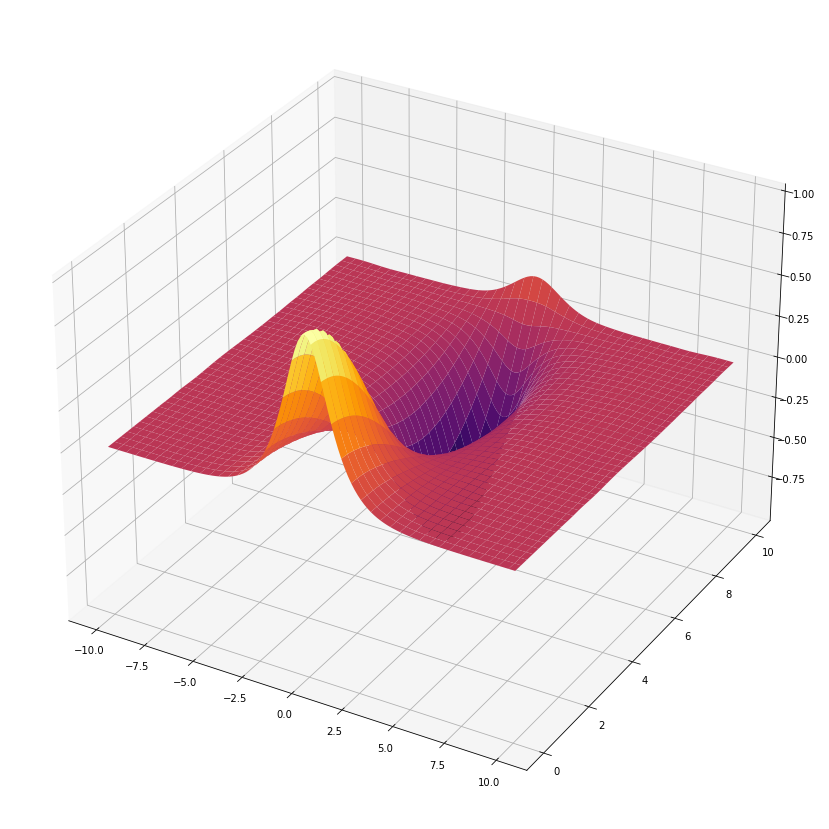

In [467]:
import numpy as np
import scipy
from scipy.fft import fft, fftfreq, ifft, fftshift, ifftshift
import cmath
from cmath import sin, exp, pi, sqrt
import math
from math import cosh, tanh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 200
M = 128
h = (b-a)/N
tau = (d-c)/M

A2  = np.empty((N+1, M+1), dtype=complex)
z = np.linspace(a, b, N+1)
t = np.linspace(c, d, M+1)
T, Z = np.meshgrid(t, z)
w = fftfreq(M+1, (d-c)/(M+1))*2*pi


for n in tqdm(range(N+1)):
    if n == 0:
        psi = CreateArr(Soliton)
        for m in range(M+1):
            A2[0][m] = psi[m]
        continue
    new = FirstOrderMethod(A2[n-1], w)
    for m in range(M+1):
        A2[n][m] = new[m]


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, Z, A2.real, cmap='inferno')

In [468]:
a2abs = np.max(abs(abs(A2) - abs(Ansol2)))

In [469]:
a1abs/a2abs

1.360319059362521

In [470]:
import numpy as np
import scipy
from scipy.fft import fft, fftfreq, ifft
import cmath
from cmath import sin, exp, pi
import math
from math import cosh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 100
M = 1024
tau = (d-c)/(M)
t = np.linspace(c, d, M)
w = fftfreq(M, (d-c)/M)*2*pi

R = []
analiticSolution = CreateArr(Soliton)
numericSolutionByN = np.empty(M, dtype=complex)
for i in tqdm(range(7)):
    n = N*(2**i)
    m = M
    h = (b-a)/(n)

    old = CreateArr(Soliton)
    for n in tqdm(range(1, N)):
        new = fft(old)
        for m in range(M):
            new[m] = new[m] * exp((1j*beta2*h*w[m]**2)/4)
        new = ifft(new)

        for m in range(M):
            norm = abs(new[m])
            new[m] = new[m] * exp(1j*gamma*h*norm**2)
    
        new = fft(new)
        for m in range(M):
            new[m] = new[m] * exp((1j*beta2*h*w[m]**2)/4)
        new = ifft(new)

        old = new
  
    numericSolutionByN = old
    print(numericSolutionByN.shape)
    print(analiticSolution.shape)
    buff = abs(numericSolutionByN) - abs(analiticSolution)
    R.append(np.mean(buff))


asw = []
for i in range(2, len(R)):
    asw.append(math.fabs((R[i-1]/R[i])))
print(asw)


(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)

[1.8453916531100036, 3.8854301732491296, 3.975885263921634, 3.810395103481438, 3.8996627415232417]


In [335]:
import numpy as np
import scipy
from scipy.fft import fft, fftfreq, ifft
import cmath
from cmath import sin, exp, pi
import math
from math import cosh
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

lamb = 1
gamma = -1
beta2 = 1
w_0 = 0

a = 0
b = 10
c = -10
d = 10

N = 100
M = 1024
tau = (d-c)/(M)
t = np.linspace(c, d, M)
w = fftfreq(M, (d-c)/M)*2*pi

R = []
analiticSolution = CreateArr(Soliton)
numericSolutionByN = np.empty(M, dtype=complex)
for i in tqdm(range(7)):
    n = N*(2**i)
    m = M
    h = (b-a)/(n)

    old = CreateArr(Soliton)
    for n in tqdm(range(1, N)):

        for m in range(M):
            norm = abs(new[m])
            new[m] = new[m] * exp(1j*gamma*h*norm**2)
    
        new = fft(new)
        for m in range(M):
            new[m] = new[m] * exp((1j*beta2*h*w[m]**2)/2)
        new = ifft(new)

        old = new
  
    numericSolutionByN = old
    print(numericSolutionByN.shape)
    print(analiticSolution.shape)
    buff = abs(numericSolutionByN) - abs(analiticSolution)
    R.append(np.mean(buff))


asw = []
for i in range(2, len(R)):
    asw.append(math.fabs((R[i-1]/R[i])))
print(asw)


(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)



(1025,)
(1025,)

[0.4736067892258007, 0.8786468039152745, 0.9861912753654654, 0.9888680368063019, 0.9920999117861996]


In [304]:
print(math.pi)

3.141592653589793
